# Max-likelihood fitting

At the time of writing this notebook (June 18, 2019), we have created stacks of AdvACT selected clusters using DES lensing. Right now there are 3 stacks: a full-sample stack with all clusters, clusters with $\xi <5$ and clusters with $\xi \geq 5$.

In this notebook we fit all three stacks and make plots of the stacks. This will also serve as an illustrative notebook of how to do the final analysis which will have actual MCMC chains ran.

In [1]:
import numpy as np
import scipy.optimize as op
import make_args #found in this directory
import model #found in this directory
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc("font", size=18, family="serif")
plt.rc("text", usetex=True)
plt.rc("errorbar", capsize=3)

In [3]:
#Filenames for each stack
fnames = ["dsigma_advact_SNRgt5_z0.1-0.9.npz", 
          "dsigma_advact_SNRgt5_z0.1-0.5.npz", 
          "dsigma_advact_SNRgt5_z0.5-0.9.npz"]

In [4]:
results = []
best_args = []
for i, fname in enumerate(fnames):
    args = make_args.get_args(fname)
    print("Working on {0}".format(fname))
    print("SNR = {0:.3f}".format(np.sqrt(args["SNR"])))
    #Model start: log10M, concentration, multiplicative bias
    start = np.array([14, 3, args["Am_mean"]])
    
    #Negative log-posterior
    def nlp(params, args):
        return -model.ACTxDES_cluster_lnpost(params, args)

    #Do a simple optimization
    result = op.minimize(nlp, start, args=(args), method="Nelder-Mead")
    results.append(result)
    
    #Pull out the best fits
    best_args.append(result.x)

Working on dsigma_advact_SNRgt5_z0.1-0.9.npz
SNR = 38.837
Working on dsigma_advact_SNRgt5_z0.1-0.5.npz
SNR = 34.055
Working on dsigma_advact_SNRgt5_z0.5-0.9.npz
SNR = 26.107


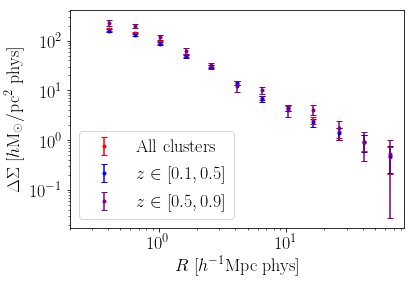

In [7]:
#Plot each data curve
colors = ["r", "b", "purple"]
labels = [r"All clusters", r"$z\in[0.1,0.5]$", r"$z\in[0.5,0.9]$"]
for i, best in enumerate(best_args):
    fname = fnames[i]
    args = make_args.get_args(fname)
    DeltaSigma, ave_DeltaSigma, _ = model.ACTxDES_cluster_lnpost(best, args, True)
    Rp = args["Rp_phys"]
    Rmid = args["Rmid_cut"]
    DS = args["DeltaSigma_cut"]
    Cov = args["Cov_cut"]
    err = np.sqrt(Cov.diagonal())
    plt.errorbar(Rmid, DS, err, ls='', marker='.', label=labels[i], color=colors[i])
    #plt.loglog(Rp, DeltaSigma)
plt.loglog()
plt.xlim(0.2, 85)
plt.ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot/pc^2}\ {\rm phys}]$")
plt.xlabel(r"$R\ [h^{-1}{\rm Mpc}\ {\rm phys}]$")
plt.legend();
plt.savefig("all_stacks_data.png", dpi=300, bbox_inches="tight");

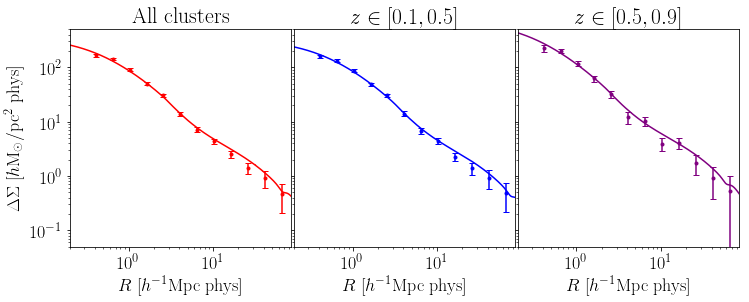

In [6]:
#Plot each fit
fig, ax = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(12,4))
plt.subplots_adjust(wspace=0.01)
labels = [r"All clusters", r"$z\in[0.1,0.5]$", r"$z\in[0.5,0.9]$"]
for i, best in enumerate(best_args):
    fname = fnames[i]
    args = make_args.get_args(fname)
    DeltaSigma, ave_DeltaSigma, _ = model.ACTxDES_cluster_lnpost(best, args, True)
    Rp = args["Rp_phys"]
    Rmid = args["Rmid_cut"]
    DS = args["DeltaSigma_cut"]
    Cov = args["Cov_cut"]
    err = np.sqrt(Cov.diagonal())
    ax[i].errorbar(Rmid, DS, err, ls='', marker='.', color=colors[i])
    ax[i].set_title(labels[i])
    ax[i].loglog(Rp, DeltaSigma, color=colors[i])
    ax[i].set_xlabel(r"$R\ [h^{-1}{\rm Mpc}\ {\rm phys}]$")
    ax[i].set_xlim(0.2, 85)
    ax[i].set_ylim(.05, 500)
ax[0].set_ylabel(r"$\Delta\Sigma\ [h{\rm M_\odot/pc^2}\ {\rm phys}]$")
fig.savefig("all_stacks_fit.png", dpi=300, bbox_inches="tight")